# Sistemas Inteligentes 2021/2022

## Mini-projeto 3: Aprendizagem Automática

## Relatório


## Grupo: 36

Número: 55856 - Nome: Bernardo Rebelo

Número: 57157 - Nome: Felipe Habib

Número: 56952 - Nome: Tiago Rosa

In [ ]:
#imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

## Processamento dos dados

(remover) Descrever e comentar os passos na leitura e processamento dos dados 

_________________

Uso do pandas

In [ ]:
df = pd.read_csv("train.csv", sep=",")
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2644,C,D-penicillamine,20296,F,N,N,N,N,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7,1.0
1,1,3492,C,Unknown,21915,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6,2.0
2,2,1702,C,D-penicillamine,18806,F,N,N,N,N,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6,1.0
3,3,3523,C,Unknown,14610,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2,2.0
4,4,3428,D,Placebo,13727,F,N,Y,Y,Y,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,2255,C,D-penicillamine,22642,F,N,N,N,N,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0,1.0
325,325,1899,C,Unknown,14975,M,Unknown,Unknown,Unknown,N,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0,4.0
326,326,1152,D,D-penicillamine,25546,M,N,Y,N,N,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9,3.0
327,327,71,D,D-penicillamine,18972,F,N,Y,Y,S,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6,4.0


_______________________

Variáveis

In [ ]:

col_idxs=[x for x in range(1, 19)]
col_names=np.array(df.columns)[col_idxs]

X = df.values[:,col_idxs]
y = df.values[:,19]
y=y.astype('int')

In [ ]:
print(col_names)

['N_Days' 'Status' 'Drug' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders'
 'Edema' 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin']


In [ ]:
print(X)

[[2644 'C' 'D-penicillamine' ... 124.70212765957449 311.0 9.7]
 [3492 'C' 'Unknown' ... 124.70212765957449 269.0 10.6]
 [1702 'C' 'D-penicillamine' ... 55.0 271.0 9.6]
 ...
 [1152 'D' 'D-penicillamine' ... 126.0 339.0 10.9]
 [71 'D' 'D-penicillamine' ... 243.0 165.0 11.6]
 [1874 'C' 'Placebo' ... 81.0 295.0 9.8]]


In [ ]:
print(y)

[1 2 1 2 3 4 3 4 4 4 4 1 1 3 3 1 3 4 4 4 1 2 2 2 3 2 4 4 4 4 3 1 4 4 3 3 4
 3 3 2 4 3 2 2 3 3 4 3 3 2 4 4 2 2 2 3 4 1 4 1 3 2 2 3 3 4 4 4 3 3 3 4 3 3
 3 2 2 4 4 3 3 3 2 2 2 4 3 4 4 3 4 4 3 4 3 3 4 3 4 2 2 3 2 2 3 2 2 4 3 4 4
 4 3 2 4 2 2 4 4 3 4 4 4 3 1 2 2 4 3 2 4 2 4 4 4 4 3 3 4 2 2 3 2 2 2 3 4 4
 4 3 4 4 4 3 4 2 4 4 2 3 4 2 2 3 3 3 4 4 4 3 2 1 3 3 4 3 3 4 2 3 3 2 3 4 4
 2 4 2 3 3 1 4 4 1 4 2 3 4 4 3 2 3 2 4 2 3 3 4 3 2 3 4 3 2 4 4 3 3 3 4 3 4
 3 4 3 4 4 4 3 3 3 4 3 4 3 4 3 3 2 2 3 3 3 3 2 3 4 4 3 2 3 4 4 2 2 2 3 1 2
 3 3 4 3 3 4 4 2 3 3 3 3 4 4 2 3 3 3 3 3 4 4 2 3 4 1 3 3 2 3 4 3 4 4 4 3 3
 4 2 2 4 3 3 4 2 2 4 3 4 3 3 3 3 3 1 3 4 2 3 4 3 2 2 4 3 1 4 3 4 2]


In [ ]:
# primeiro construir um dataframe para a matriz X
df_X=df[col_names]
# criar um novo DataFrame
df_Xdum = pd.get_dummies(df_X, columns = col_names)
# Extrair os novos nomes das colunas
col_names_dum=np.array(df_Xdum.columns)

df_Xdum

,N_Days_41,N_Days_43,N_Days_51,N_Days_71,N_Days_77,N_Days_110,N_Days_111,N_Days_130,N_Days_131,N_Days_179,...,Prothrombin_12.9,Prothrombin_13.0,Prothrombin_13.1,Prothrombin_13.2,Prothrombin_13.3,Prothrombin_13.6,Prothrombin_13.8,Prothrombin_15.2,Prothrombin_17.1,Prothrombin_18.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Xdum=df_Xdum.values
Xdum

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
print(Xdum.shape)

(329, 1966)


## Ajustamento dos modelos

In [ ]:
from sklearn.tree import DecisionTreeClassifier

sk_dt=DecisionTreeClassifier(criterion = "entropy")
sk_dt.fit(Xdum, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
preds = sk_dt.predict(Xdum)
for i in range(df_Xdum.shape[0]):
    print(f"Classe real: {y[i]}; Previsão: {preds[i]} ")
    
print("\nNúmero Total de más predições: ", sum(preds!=y))

Classe real: 1; Previsão: 1 
Classe real: 2; Previsão: 2 
Classe real: 1; Previsão: 1 
Classe real: 2; Previsão: 2 
Classe real: 3; Previsão: 3 
Classe real: 4; Previsão: 4 
Classe real: 3; Previsão: 3 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 1; Previsão: 1 
Classe real: 1; Previsão: 1 
Classe real: 3; Previsão: 3 
Classe real: 3; Previsão: 3 
Classe real: 1; Previsão: 1 
Classe real: 3; Previsão: 3 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 1; Previsão: 1 
Classe real: 2; Previsão: 2 
Classe real: 2; Previsão: 2 
Classe real: 2; Previsão: 2 
Classe real: 3; Previsão: 3 
Classe real: 2; Previsão: 2 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 3; Previsão: 3 
Classe real: 1; Previsão: 1 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 3

In [ ]:
from sklearn.tree import export_text
the_tree = export_text(sk_dt,feature_names=list(col_names_dum))
print(the_tree)

|--- Hepatomegaly_Y <= 0.50
|   |--- Status_C <= 0.50
|   |   |--- Edema_N <= 0.50
|   |   |   |--- Ascites_N <= 0.50
|   |   |   |   |--- Platelets_265.0 <= 0.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- Platelets_265.0 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Ascites_N >  0.50
|   |   |   |   |--- Cholesterol_176.0 <= 0.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Cholesterol_176.0 >  0.50
|   |   |   |   |   |--- class: 4
|   |   |--- Edema_N >  0.50
|   |   |   |--- Prothrombin_10.7 <= 0.50
|   |   |   |   |--- Prothrombin_11.0 <= 0.50
|   |   |   |   |   |--- Albumin_3.83 <= 0.50
|   |   |   |   |   |   |--- SGOT_130.2 <= 0.50
|   |   |   |   |   |   |   |--- Prothrombin_10.2 <= 0.50
|   |   |   |   |   |   |   |   |--- Prothrombin_10.5 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Drug_D-penicillamine <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Prothrombin_10.9 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncat

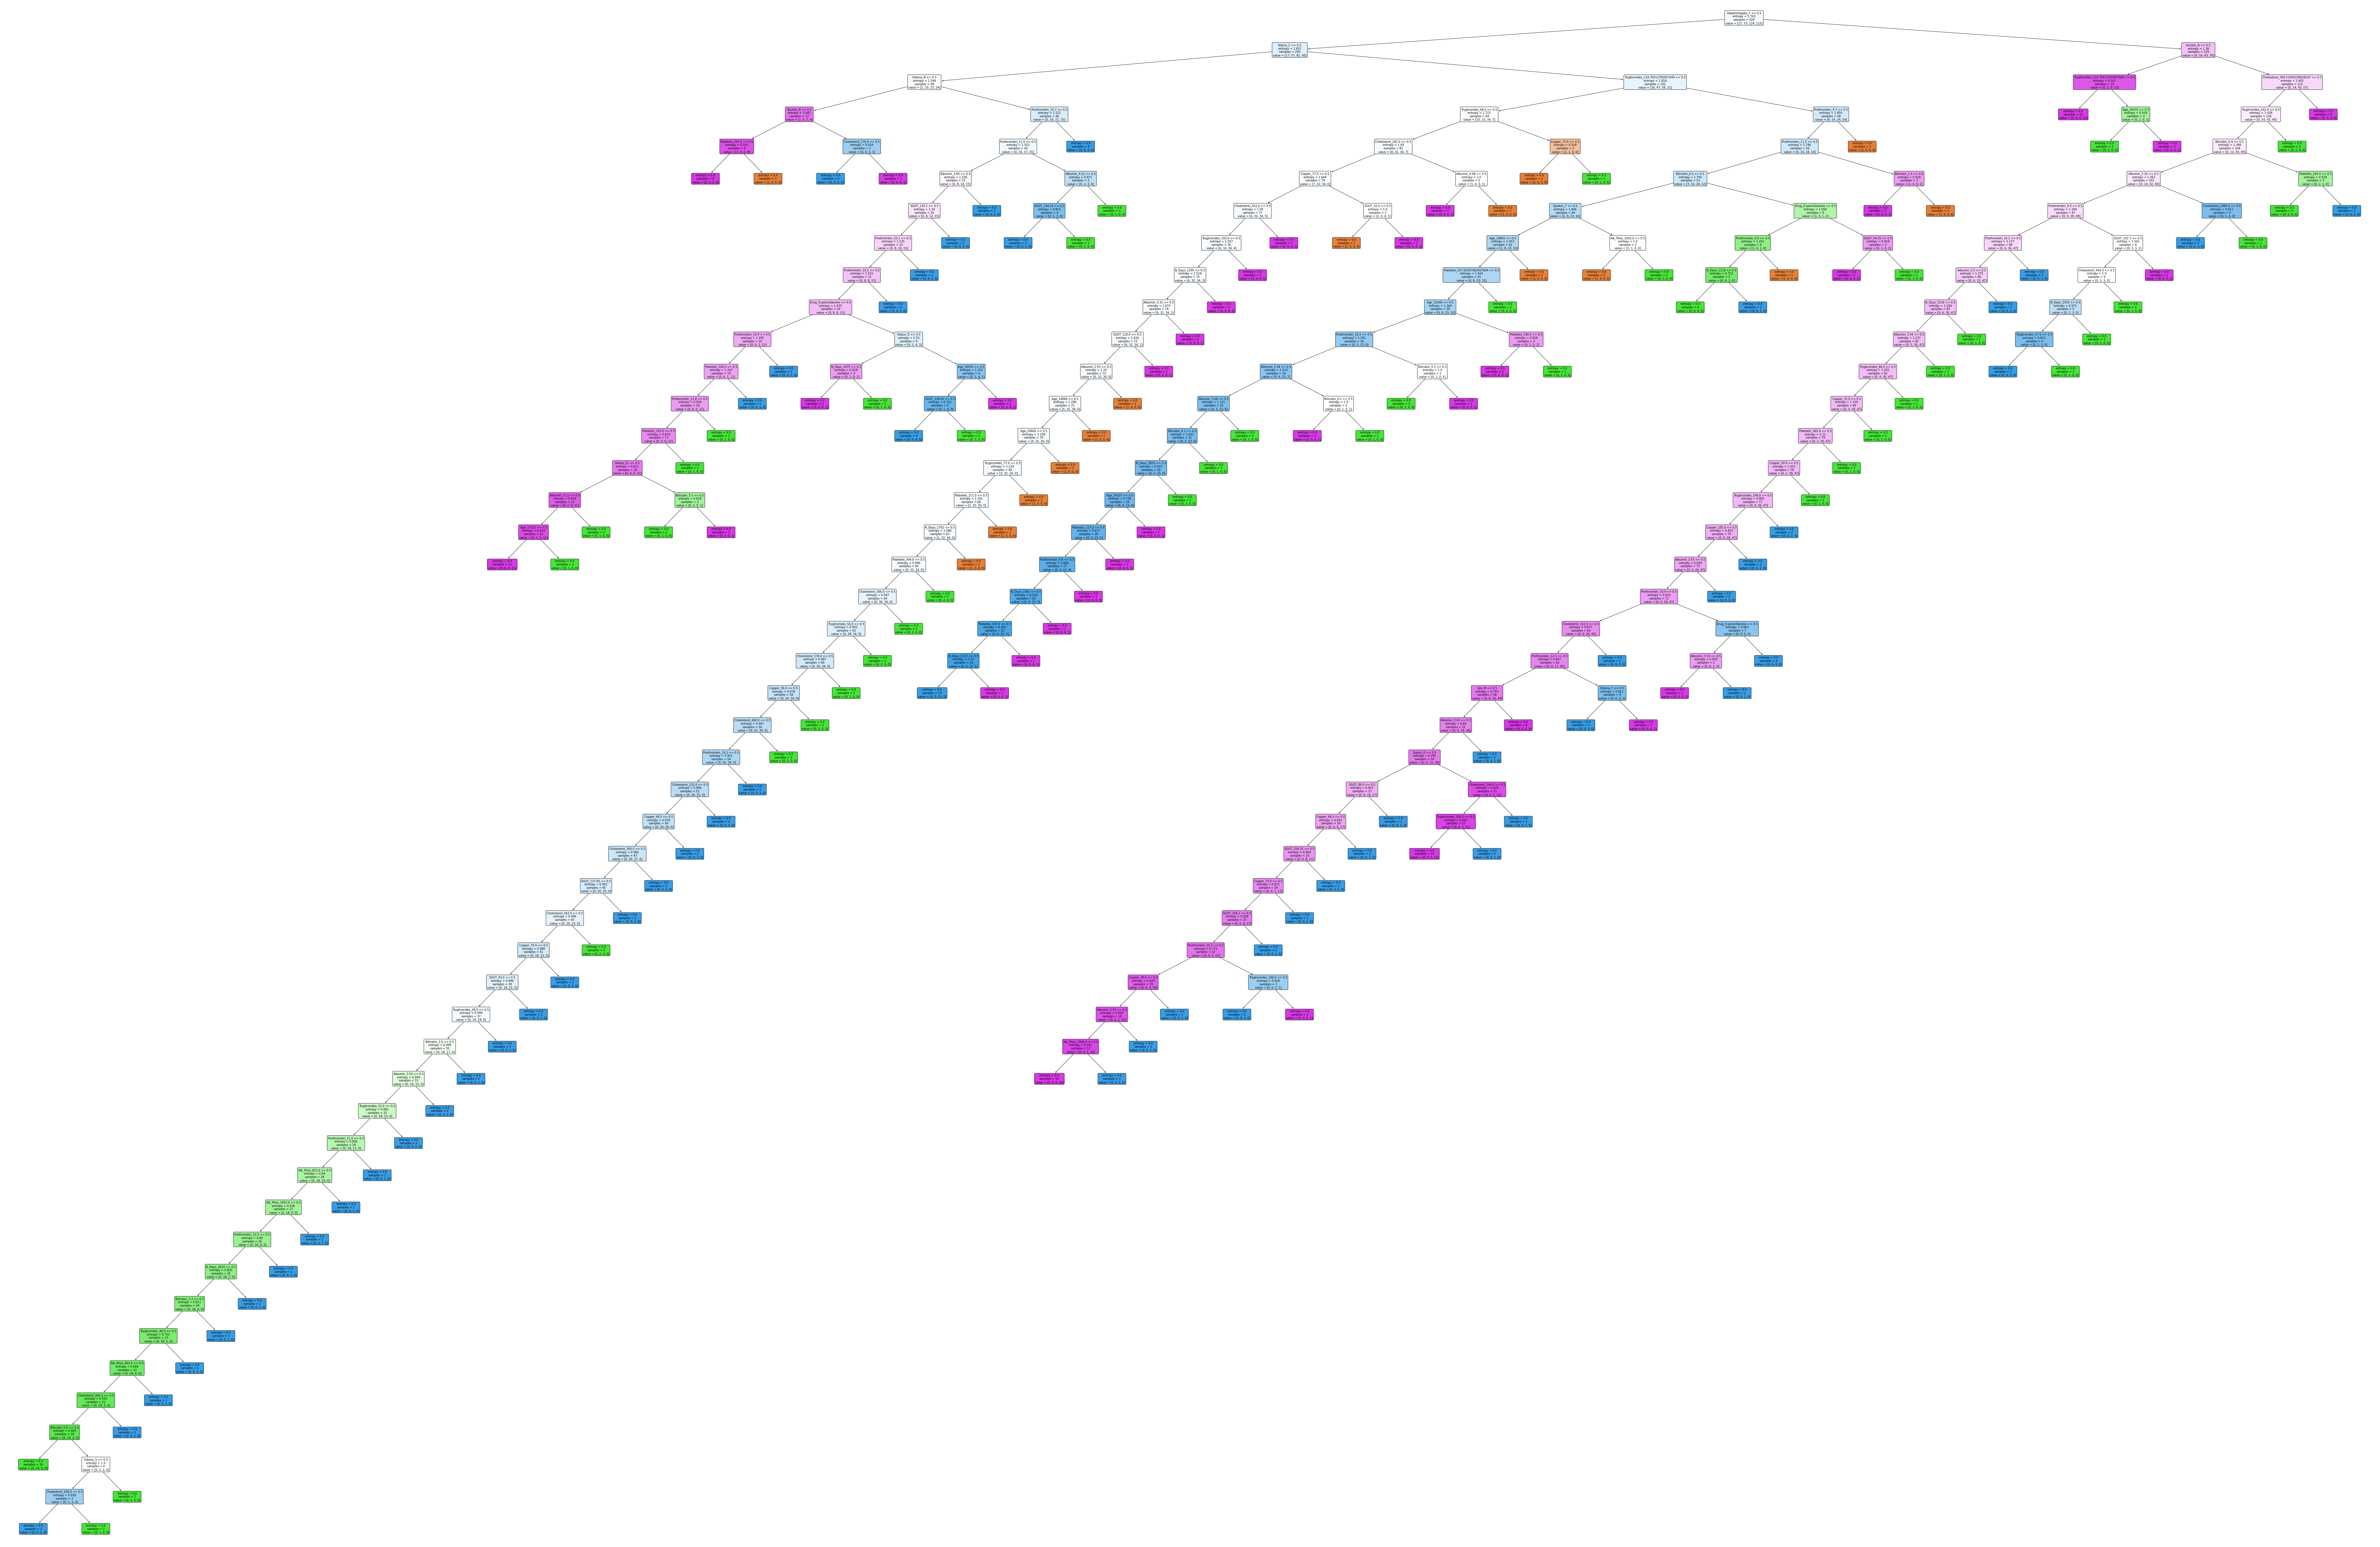

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=[150,100]) # width, height in inches
plot_tree(sk_dt, 
          feature_names=col_names_dum,
          filled=True, rounded=True)
plt.show()

Vamos adicionar Argumentos ao `DecisionTreeClassifier` para permitir gerar árvores que não se ajustem demasiado aos dados.

In [ ]:
sk_new_dt=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4, min_samples_leaf=3, random_state=1)
sk_new_dt.fit(Xdum, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=4, random_state=1)

In [ ]:
print('Profundidade da árvore obtida:', sk_new_dt.get_depth())
print('Número de folhas da árvore obtida:', sk_new_dt.get_n_leaves())

Profundidade da árvore obtida: 5
Número de folhas da árvore obtida: 18


In [ ]:
preds2 = sk_new_dt.predict(Xdum)
for i in range(df_Xdum.shape[0]):
    print(f"Classe real: {y[i]}; Previsão: {preds2[i]} ")
    
print("\nNúmero Total de más predições: ", sum(preds2!=y))

Classe real: 1; Previsão: 3 
Classe real: 2; Previsão: 2 
Classe real: 1; Previsão: 3 
Classe real: 2; Previsão: 2 
Classe real: 3; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 3; Previsão: 3 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 1; Previsão: 1 
Classe real: 1; Previsão: 3 
Classe real: 3; Previsão: 3 
Classe real: 3; Previsão: 3 
Classe real: 1; Previsão: 3 
Classe real: 3; Previsão: 3 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 1; Previsão: 2 
Classe real: 2; Previsão: 4 
Classe real: 2; Previsão: 4 
Classe real: 2; Previsão: 4 
Classe real: 3; Previsão: 4 
Classe real: 2; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 1 
Classe real: 4; Previsão: 4 
Classe real: 4; Previsão: 4 
Classe real: 3; Previsão: 3 
Classe real: 1; Previsão: 3 
Classe real: 4; Previsão: 3 
Classe real: 4; Previsão: 4 
Classe real: 3

In [268]:
the_tree = export_text(sk_new_dt,feature_names=list(col_names_dum))
print(the_tree)

|--- Hepatomegaly_Y <= 0.50
|   |--- Status_C <= 0.50
|   |   |--- Cholesterol_369.51056338028167 <= 0.50
|   |   |   |--- Status_CL <= 0.50
|   |   |   |   |--- Prothrombin_11.0 <= 0.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Prothrombin_11.0 >  0.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- Status_CL >  0.50
|   |   |   |   |--- class: 3
|   |   |--- Cholesterol_369.51056338028167 >  0.50
|   |   |   |--- Edema_S <= 0.50
|   |   |   |   |--- Status_CL <= 0.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- Status_CL >  0.50
|   |   |   |   |   |--- class: 4
|   |   |   |--- Edema_S >  0.50
|   |   |   |   |--- class: 4
|   |--- Status_C >  0.50
|   |   |--- Prothrombin_11.0 <= 0.50
|   |   |   |--- Sex_M <= 0.50
|   |   |   |   |--- Prothrombin_9.9 <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Prothrombin_9.9 >  0.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- Sex_M >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Prothrombin_1

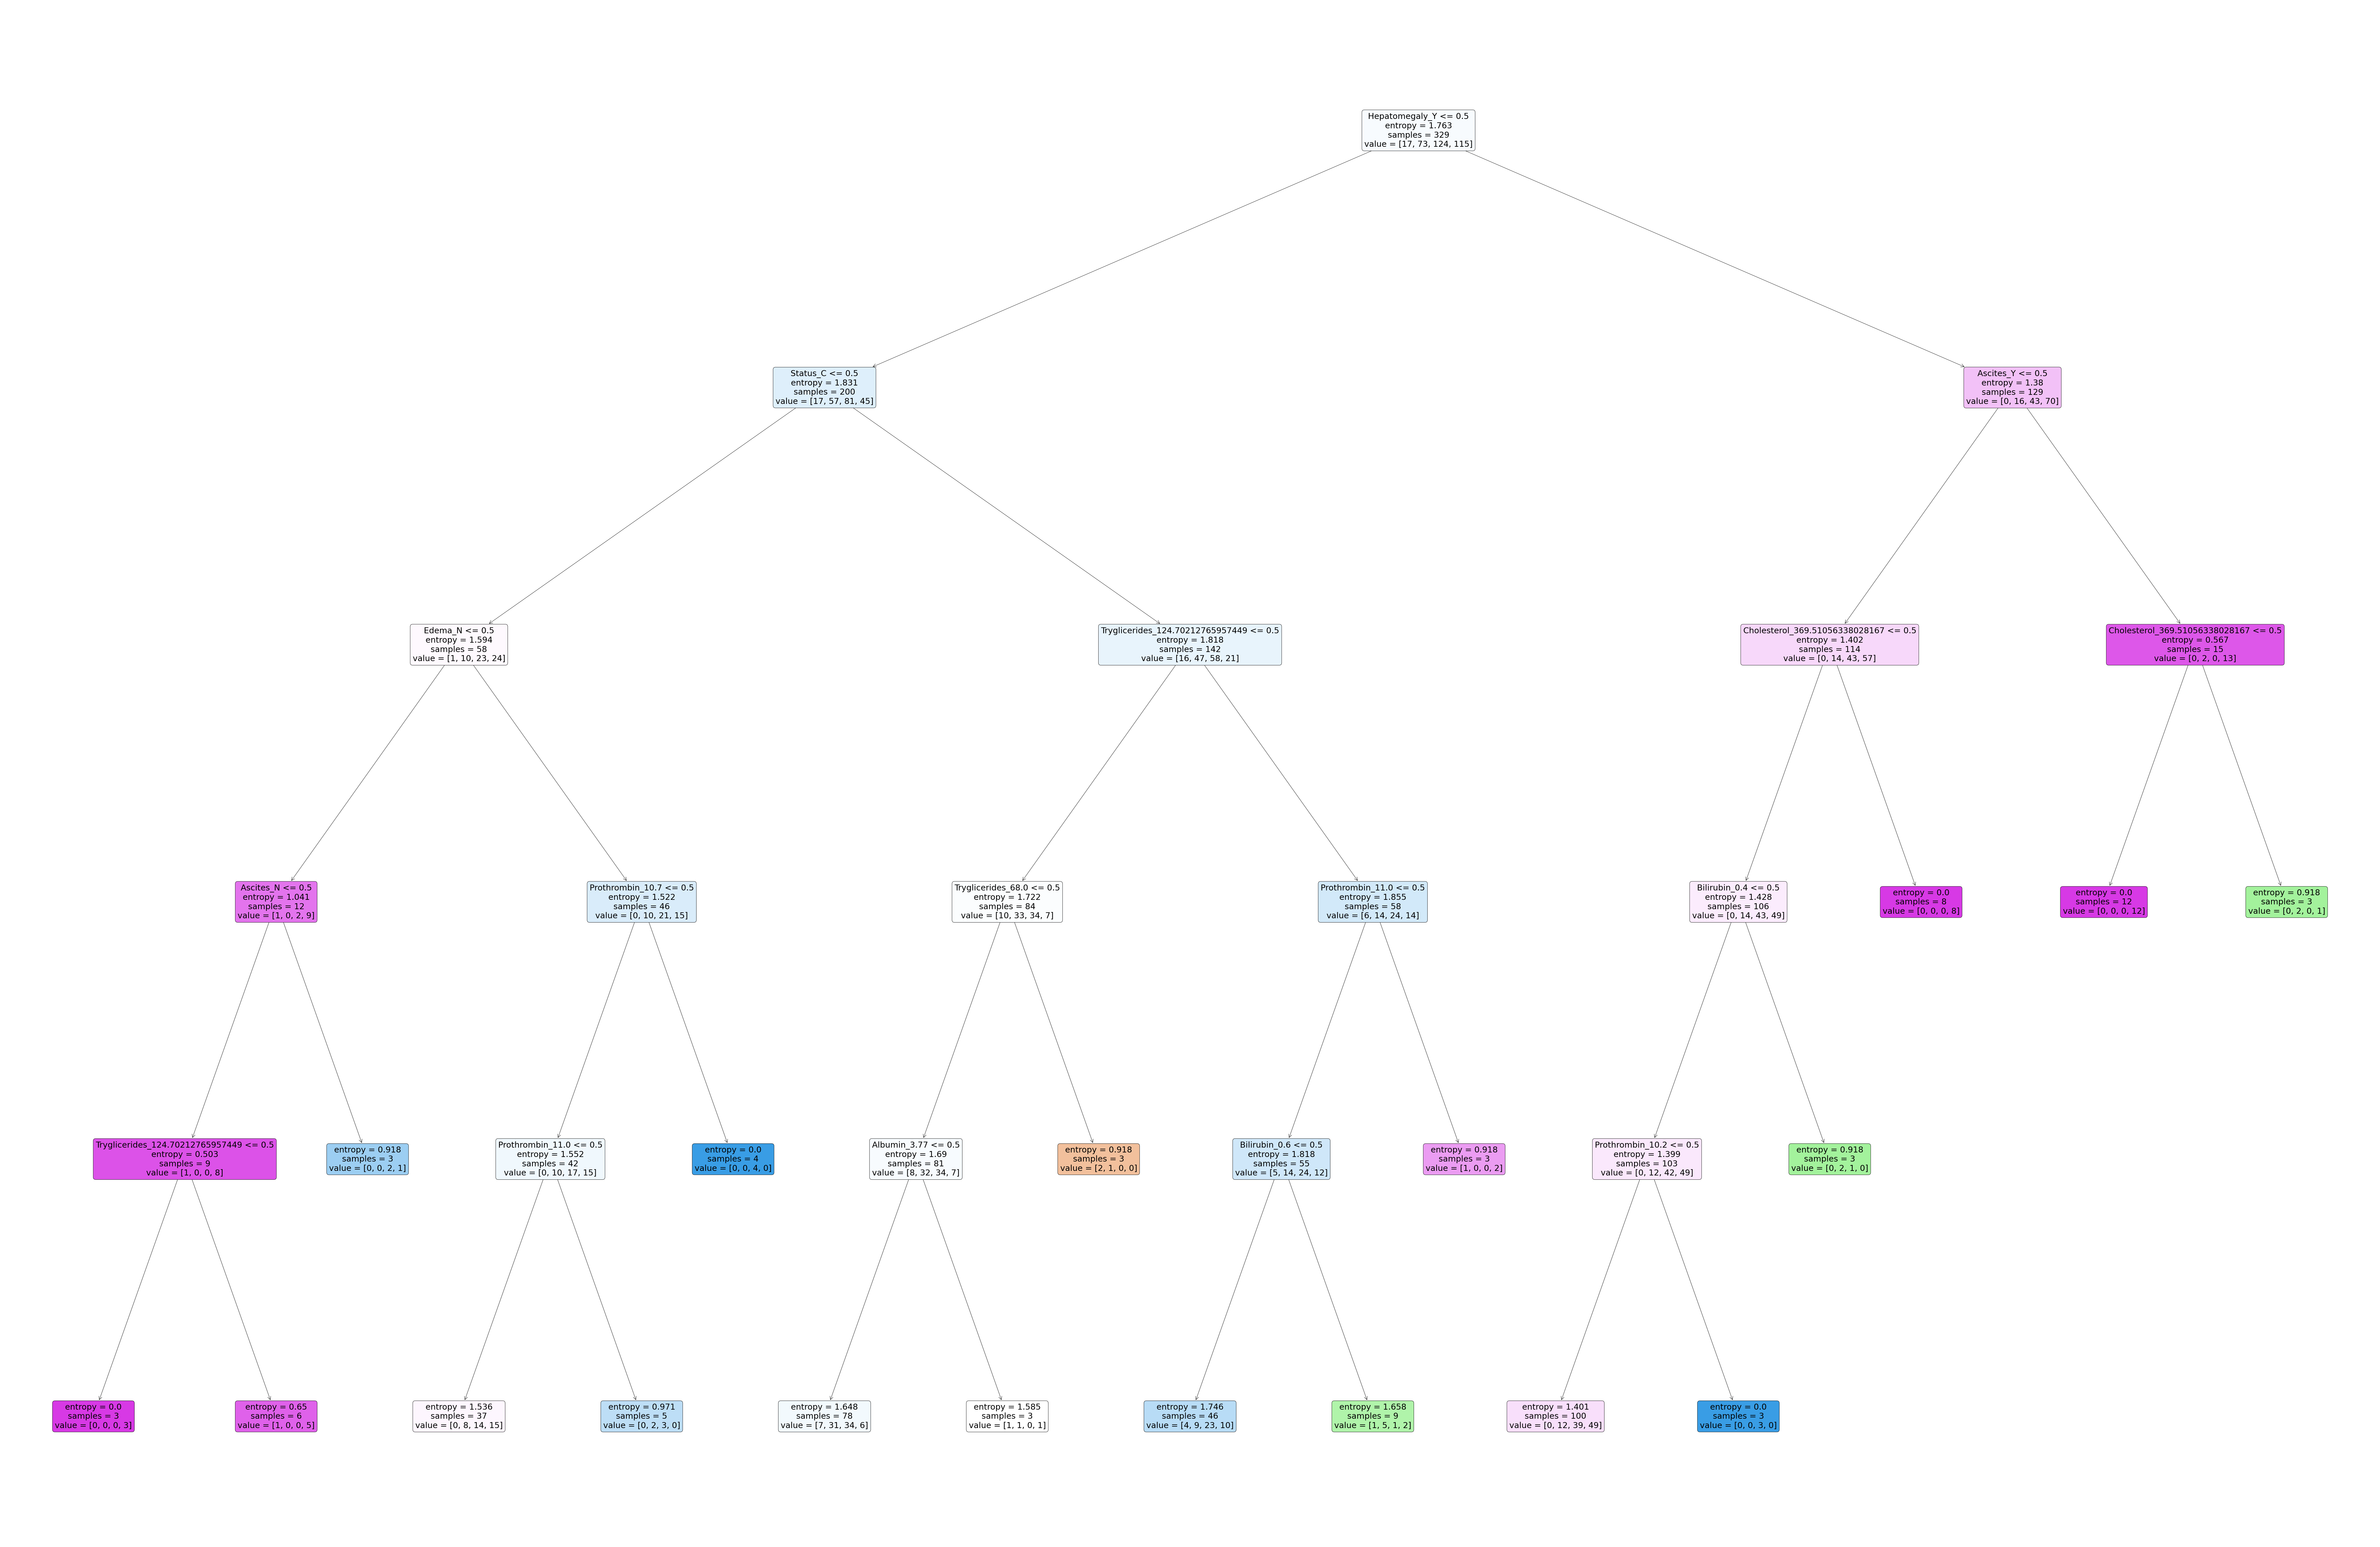

In [ ]:
plt.figure(figsize=[150,100]) # width, height in inches
plot_tree(sk_new_dt, 
          feature_names=col_names_dum,
          filled=True, rounded=True)
plt.show()

Avaliar o modelo

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(Xdum,
                                                    y,
                                                    random_state=2)

In [257]:
print(X_train.shape)
print(X_test.shape)

(246, 1966)
(83, 1966)


Vamos agora treinar uma árvore de decisão usando apenas o conjunto de treino.

usar sk_new_dt

In [258]:
sk_new_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=4, random_state=1)

In [259]:
print('Árvore de decisão:')
print('Accuracy train:', sk_new_dt.score(X_train,y_train))
print('Accuracy test:', sk_new_dt.score(X_test,y_test))

Árvore de decisão:
Accuracy train: 0.540650406504065
Accuracy test: 0.3493975903614458


Overfitting

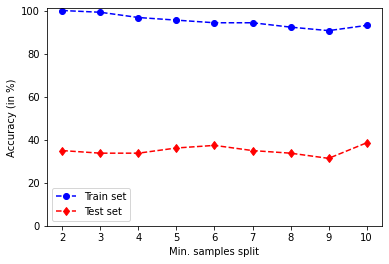

In [260]:
import matplotlib.pyplot as plt

train = []
test = []
for i in range(2,11):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,11,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(0,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

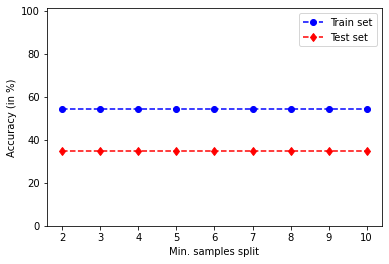

In [261]:
import matplotlib.pyplot as plt

train = []
test = []
for i in range(2,11):
    ad = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3, random_state=1, min_samples_split=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,11,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(0,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

Cross-Validation

usando sk_new_dt

In [262]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sk_new_dt,
                         X=Xdum,
                         y=y,
                         cv=10
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	0.30303030303030304
	0.48484848484848486
	0.36363636363636365
	0.3333333333333333
	0.3939393939393939
	0.45454545454545453
	0.45454545454545453
	0.42424242424242425
	0.6060606060606061
	0.34375
Average CV accuracy: 0.416 +/- 0.085


Métricas de avaliação

In [263]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("Árvore original")
print("A accuracy é: %7.4f" % accuracy_score(y_test, preds))
print("A precision é: %7.4f" % precision_score(y_test, preds))
print("O recall é: %7.4f" % recall_score(y_test, preds))
print("O score F1 é: %7.4f" % f1_score(y_test, preds))

Árvore original


ValueError: Found input variables with inconsistent numbers of samples: [83, 329]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

ValueError: Found input variables with inconsistent numbers of samples: [83, 329]

KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_iris = KNeighborsClassifier(n_neighbors=1)
knn_iris.fit(Xdum,y)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
import numpy as np
import random

l = []
for x in range(1966):
    l.append(random.randint(0, 1))

X_new = np.array([l])
p = knn_iris.predict(X_new)
print(p)

[2]


CategoricalNB

In [266]:
from sklearn.naive_bayes import CategoricalNB
mdl = CategoricalNB(alpha=0.01)

l1 = []
for x in range(1966):
    l.append(random.randint(0, 1))

l2 = []
for x in range(1966):
    l.append(random.randint(0, 1))

l3 = []
for x in range(1966):
    l.append(random.randint(0, 1))

l4 = []
for x in range(1966):
    l.append(random.randint(0, 1))

X_test=np.array([l1, l2, l3, l4])
mdl.fit(Xdum,y)
probas=mdl.predict_proba(X_test)
for i, x in enumerate(probas):
    print("Caso: ", X_test[i])
    for j, c in enumerate(["N", "P"]):
        print("\tP(Y = %s | X=%s )= %7.4f"% (c, X_test[i], x[j]))

ValueError: Found array with 0 feature(s) (shape=(4, 0)) while a minimum of 1 is required by CategoricalNB.

## Competição
    

Cria ficheiro predicoes.txt proveniente de preds2

In [267]:
lenght = len(preds2)
ids = [id for id in range(1, lenght + 1)]
# print(ids)

with open('predicoes.txt', 'w') as writer:
    writer.write('ID, Stage\n')
    for i in range(len(preds)):
        writer.write(str(ids[i]) + ',' + str(preds[i]) + '\n')